In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

# **Data gathering**

In [4]:
url = "http://bit.ly/w-data"

In [40]:
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# EDA

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Visuilizae data**

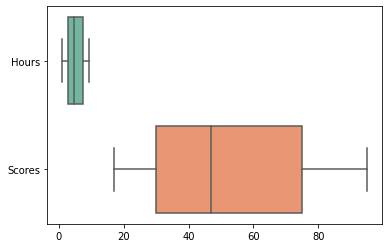

In [17]:
sns.boxplot(data=data, orient="h", palette="Set2")

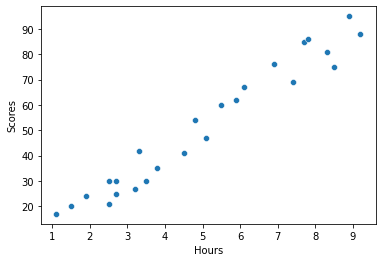

In [23]:
sns.scatterplot(data=data, x="Hours", y="Scores")

# **check outliers by z scores**


In [34]:
mean = np.mean(data['Scores'])
std = np.std(data['Scores'])
print(mean)
print(std)



51.48
24.775988375844868


In [36]:
threshold = 3
outlier = []
for i in data['Scores']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


In [39]:
mean = np.mean(data['Hours'])
std = np.std(data['Hours'])
print(mean)
print(std)
threshold = 3
outlier = []
for i in data['Hours']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

5.012
2.47407679751458
outlier in dataset is []


# **make linear regrresion model**


In [108]:
 from sklearn.linear_model import LinearRegression
 from sklearn import metrics 

# **Split data**


In [77]:
X =data.iloc[:, :-1]
y=data.iloc[:,-1]



In [99]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# **train the  model and check the score**

In [100]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)*100

95.15510725211553

In [101]:
reg.score(X_test,y_test)*100

94.54906892105353

# **visuilize the linear regreesion model**

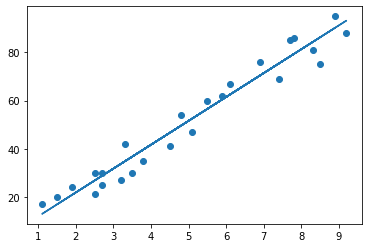

In [102]:
line=reg.coef_*X+reg.intercept_

plt.scatter(X,y)
plt.plot(X, line)
plt.show()

# **what is the score if he studied 9.25 hours **

In [107]:

y_pred = reg.predict(X=[[9.25]])
print(y_pred)

[93.69173249]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
